Experiment of BatchNormalization usage with and without bias.

In [1]:
# load the mltb lib - see here: https://github.com/PhilipMay/mltb
!pip install mltb==0.0.9

In [2]:
import mltb
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [3]:
# load MNIST data
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

In [4]:
# show shape of data
print("train_images.shape:", train_images.shape)
print("train_labels.shape:", train_labels.shape)
print("val_images.shape:", val_images.shape)
print("val_labels.shape:", val_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
val_images.shape: (10000, 28, 28)
val_labels.shape: (10000,)


In [5]:
# one hot encode the labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [6]:
# flatten the data so we can send it to dense layer
train_images = train_images.reshape((60000, 28 * 28))
val_images = val_images.reshape((10000, 28 * 28))

In [7]:
# normalization (min-max scaling) to 0 to 1
train_images = train_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255

In [8]:
#network with BatchNormalization and with bias
def network_a():
    network = models.Sequential()
    network.add(layers.Dense(100, input_shape=(28 * 28,)))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(100))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu')) 
    network.add(layers.Dense(100))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(10, activation='softmax'))
    return network

In [9]:
#network with BatchNormalization but without bias (use_bias=False)
def network_b():
    network = models.Sequential()
    network.add(layers.Dense(100, use_bias=False, input_shape=(28 * 28,)))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(100, use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu')) 
    network.add(layers.Dense(100, use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(10, activation='softmax'))
    return network

In [10]:
# print summary representation of network a
network_a().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
__________

In [11]:
# print summary representation of network b
network_b().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78400     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10000     
__________

In [12]:
# create the different networks, fit them and return results
def fit(value):
    network = None
    
    if value == 'a':
        network = network_a()
    if value == 'b':
        network = network_b()
        
    network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
 
    es = EarlyStopping(monitor='val_acc', patience=5, mode='max')
    
    history = network.fit(train_images, train_labels, 
                          validation_data=(val_images, val_labels), 
                          epochs=100, 
                          callbacks=[es],
                          verbose=0,
                          batch_size=128)
    
    best_val_acc = max(history.history['val_acc'])
    
    best_val_acc_epoch = history.history['val_acc'].index(best_val_acc) + 1
    
    return {'best_val_acc' : best_val_acc, 'best_val_acc_epoch' : best_val_acc_epoch}

In [13]:
# dict with call params (here just a or b)
param_dict = {'relu + BN + bias' : 'a', 
              'relu + BN no bias' : 'b', 
             }

# fit the networks many times and return the result
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/tools.py
result = mltb.tools.multi_param_call(fit, param_dict, 41)

Done with relu + BN + bias - iteration 1 of 41.
Done with relu + BN + bias - iteration 2 of 41.
Done with relu + BN + bias - iteration 3 of 41.
Done with relu + BN + bias - iteration 4 of 41.
Done with relu + BN + bias - iteration 5 of 41.
Done with relu + BN + bias - iteration 6 of 41.
Done with relu + BN + bias - iteration 7 of 41.
Done with relu + BN + bias - iteration 8 of 41.
Done with relu + BN + bias - iteration 9 of 41.
Done with relu + BN + bias - iteration 10 of 41.
Done with relu + BN + bias - iteration 11 of 41.
Done with relu + BN + bias - iteration 12 of 41.
Done with relu + BN + bias - iteration 13 of 41.
Done with relu + BN + bias - iteration 14 of 41.
Done with relu + BN + bias - iteration 15 of 41.
Done with relu + BN + bias - iteration 16 of 41.
Done with relu + BN + bias - iteration 17 of 41.
Done with relu + BN + bias - iteration 18 of 41.
Done with relu + BN + bias - iteration 19 of 41.
Done with relu + BN + bias - iteration 20 of 41.
Done with relu + BN + bias - 

In [14]:
#print the result
print(result)

{'best_val_acc': {'relu + BN + bias': [0.9776, 0.9806, 0.9776, 0.9793, 0.9796, 0.9806, 0.9818, 0.9791, 0.9795, 0.9819, 0.9805, 0.9761, 0.9819, 0.979, 0.9799, 0.9779, 0.978, 0.9786, 0.9795, 0.9785, 0.9787, 0.9792, 0.9782, 0.9808, 0.9783, 0.9783, 0.9787, 0.9802, 0.9812, 0.9797, 0.9812, 0.9808, 0.9802, 0.9808, 0.9796, 0.9795, 0.9782, 0.9785, 0.9808, 0.9782, 0.9806], 'relu + BN no bias': [0.9804, 0.9787, 0.9819, 0.9792, 0.9804, 0.9777, 0.9763, 0.9785, 0.9781, 0.9805, 0.979, 0.9787, 0.9808, 0.9785, 0.9798, 0.9795, 0.9803, 0.981, 0.9783, 0.9788, 0.9771, 0.9755, 0.9797, 0.9791, 0.9805, 0.979, 0.98, 0.9795, 0.9828, 0.9797, 0.9794, 0.9801, 0.9777, 0.9782, 0.9797, 0.9785, 0.9798, 0.9802, 0.9812, 0.9802, 0.9807]}, 'best_val_acc_epoch': {'relu + BN + bias': [5, 14, 7, 8, 12, 15, 15, 8, 11, 25, 9, 4, 19, 11, 7, 8, 6, 7, 10, 10, 21, 7, 8, 17, 8, 4, 10, 16, 23, 8, 16, 18, 13, 28, 7, 12, 9, 4, 21, 14, 16], 'relu + BN no bias': [13, 14, 13, 7, 19, 12, 6, 11, 8, 13, 9, 5, 20, 7, 16, 11, 19, 14, 7, 10, 8

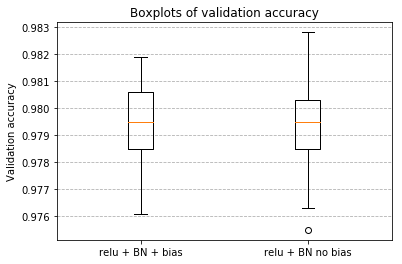

In [15]:
# print boxplots to compare validation accuracy of both results 
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/plot.py
mltb.plot.boxplot_dict(result['best_val_acc'], 
                       ylabel='Validation accuracy', 
                       title='Boxplots of validation accuracy'
                      )

In [16]:
# p-value for validation accuracy - can we reject the null hypothesis?
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/tools.py
print('p-value for best_val_acc:', mltb.tools.ttest_combinations(result['best_val_acc']))

p-value for best_val_acc: {('relu + BN + bias', 'relu + BN no bias'): 0.7365710071459269}


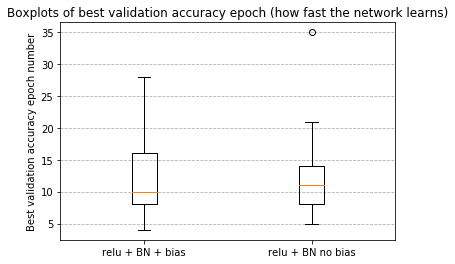

In [17]:
# print boxplots to compare wich epoch had the best validation accuracy (how fast the network learns)
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/plot.py
mltb.plot.boxplot_dict(result['best_val_acc_epoch'], 
                       ylabel='Best validation accuracy epoch number', 
                       title='Boxplots of best validation accuracy epoch (how fast the network learns)'
                      )

In [18]:
# p-value for best validation accuracy epoch - can we reject the null hypothesis?
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/tools.py
print('p-value for best_val_acc_epoch:', mltb.tools.ttest_combinations(result['best_val_acc_epoch']))

p-value for best_val_acc_epoch: {('relu + BN + bias', 'relu + BN no bias'): 0.9550379256642582}
